# Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Step 2: Load the dataset

In [2]:
data=pd.read_csv("c:\\Users\\Administrator\\Downloads\\Housing-2-1.csv")


# Step 3: Data Exploration and Preprocessing

In [3]:
# Display the first few rows of the dataset

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# checking for missing values
missing_values=data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# handle missing values (if necessary)
# for example to remove row with missing values

dropnull=data.dropna(inplace=True)



In [8]:
# convert categorical variable to numeric using on - hot encoding

data= pd.get_dummies(data,columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True) 

# Step 4: Define the target and input features

In [10]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = data['price']

# Step 5: Data Splitting

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78)

# Step 6: Linear Regression Modeling

In [12]:
# train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Step 7: Model Evaluation

In [13]:
# make prediction on test data
y_pred = model.predict(X_test)

In [14]:
# evaluate the model's performance
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1331355574081.76
R-squared: 0.49


# Step 8: Visualization

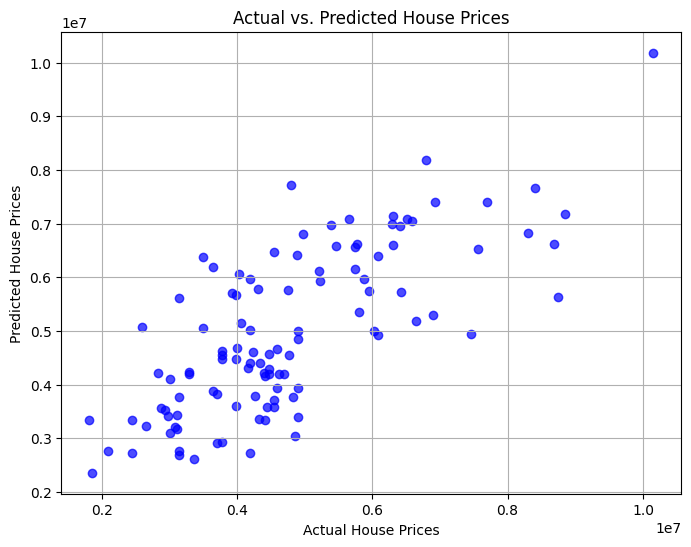

In [15]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Step 9: Interpretation

In [16]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 264.31
bedrooms: 84456.60
bathrooms: 978389.08
stories: 522670.50
parking: 325522.83
mainroad_yes: 300377.64
guestroom_yes: 262744.53
basement_yes: 354415.73
hotwaterheating_yes: 889726.92
airconditioning_yes: 858669.69
prefarea_yes: 731308.66
furnishingstatus_semi-furnished: 41084.99
furnishingstatus_unfurnished: -397766.73
Intercept: -28017.62
